In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

## EPL

### Data Train (Season 2009/2010 until Season 2010/2011)

In [2]:
df1 = pd.read_csv("datasets/EPL_sort.csv", index_col=0)
df1 = df1[df1['season'] != '2008/2009']
df1 = df1[['match_api_id','B365H', 'B365D', 'B365A']]
df1.head()

,match_api_id,B365H,B365D,B365A
382,658575,1.67,3.60,5.50
385,658578,3.60,3.25,2.10
386,658579,2.25,3.25,3.25
389,658582,1.17,6.50,21.00
383,658576,3.20,3.25,2.30


In [3]:
df2 = pd.read_csv("datasets/epl_data_train_onehot_matchid.csv")
df2.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,1987033,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
1,1987034,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-9
2,1987035,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-13
3,1987036,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4
4,1987037,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1


In [4]:
df_train = df1.set_index('match_api_id').join(df2.set_index('match_api_id'))
df_train = df_train.reset_index()
df_train = df_train.drop(columns = ['match_api_id'])
df_train.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2650,1.17,9.00,17.00,2,0.61,0.281250,0.433735,0.911392,0.026316,0.026316,0,3,0,3,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.657895,-1.184211,0.000000,0.210526,-11
2651,2.30,3.75,3.10,1,0.58,0.697917,0.626506,0.443038,0.026316,0.078947,0,1,0,3,1,3,0,3,0,3,0,0,0,0,0,0,0,0,0.157895,0.842105,-0.052632,-0.157895,-15
2652,1.80,4.00,4.50,2,0.56,0.406250,0.662651,0.810127,0.000000,0.078947,1,1,3,1,0,3,1,1,1,1,0,0,0,0,0,0,1,0,0.026316,-0.657895,-0.078947,0.026316,-13
2653,4.50,4.00,1.80,2,0.39,0.708333,0.771084,0.379747,0.026316,0.000000,0,3,0,0,3,1,0,0,3,3,0,0,0,0,0,0,0,0,-0.657895,1.000000,0.026316,0.026316,4
2654,1.36,5.50,9.00,2,0.55,0.395833,0.481928,0.594937,0.078947,0.078947,3,3,3,0,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0.394737,-0.236842,0.000000,0.210526,-3
2655,3.50,3.60,2.15,2,0.39,0.666667,0.650602,0.620253,0.000000,0.078947,1,0,1,1,1,3,1,3,3,0,0,0,1,0,0,0,0,0,-0.394737,0.394737,-0.078947,-0.236842,-4
2656,6.00,4.75,1.53,1,0.41,0.729167,0.614458,0.506329,0.078947,0.026316,3,3,1,1,3,0,1,3,0,3,0,0,0,0,0,0,0,0,-0.263158,0.789474,0.052632,0.026316,11
2657,2.05,3.75,3.70,1,0.38,0.479167,0.578313,0.759494,0.000000,0.078947,1,1,3,1,3,3,3,0,0,3,0,0,0,0,0,0,0,0,-0.263158,-0.368421,-0.078947,-0.131579,4
2658,2.40,3.60,3.00,1,0.33,0.645833,0.566265,0.620253,0.026316,0.026316,0,1,0,1,1,0,3,1,0,3,0,0,0,0,0,0,0,0,-0.368421,0.342105,0.000000,-0.157895,15
2659,1.67,4.20,5.25,2,0.46,0.458333,0.409639,0.810127,0.000000,0.026316,1,3,0,3,3,0,1,1,1,3,0,0,0,0,0,0,0,0,0.315789,-0.526316,-0.026316,0.157895,-11


### Data Test (Season 2008/2009)

In [5]:
df3 = pd.read_csv("datasets/EPL_sort.csv", index_col=0)
df3 = df3[df3['season'] == '2008/2009']
df3 = df3[['match_api_id','B365H', 'B365D', 'B365A']]
df3.head()

,match_api_id,B365H,B365D,B365A
1,489043,1.20,6.5,15.00
7,489049,1.83,3.5,4.50
5,489047,2.00,3.3,4.00
8,489050,2.60,3.2,2.80
6,489048,3.20,3.4,2.25


In [6]:
df4 = pd.read_csv("datasets/epl_data_test_onehot_matchid.csv")
df4.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,489043,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-14
1,489049,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-11
2,489047,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-4
3,489050,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,489048,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7


In [7]:
df_test = df3.set_index('match_api_id').join(df4.set_index('match_api_id'))
df_test = df_test.reset_index()
df_test = df_test.drop(columns = ['match_api_id'])
df_test.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
370,1.33,5.0,10.00,2,0.64,0.385417,0.433735,0.645570,0.026316,0.078947,0,1,3,3,0,3,3,1,1,3,0,0,0,0,0,0,0,0,0.736842,-0.368421,-0.052632,-0.026316,-14
371,2.30,3.4,3.10,2,0.53,0.416667,0.578313,0.734177,0.026316,0.000000,0,1,3,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0.131579,-0.473684,0.026316,0.052632,-2
372,1.83,3.5,4.50,1,0.40,0.375000,0.722892,0.848101,0.000000,0.000000,1,3,1,3,1,1,3,1,3,1,0,0,0,0,0,0,0,0,-0.526316,-0.815789,0.000000,0.000000,-8
373,2.10,3.3,3.60,0,0.39,0.552083,0.385542,0.468354,0.078947,0.078947,3,3,1,3,0,3,0,3,1,0,0,0,0,0,0,0,0,0,0.184211,0.421053,0.000000,0.052632,12
374,3.00,3.5,2.30,0,0.39,0.697917,0.759036,0.303797,0.026316,0.026316,0,1,1,1,1,0,3,3,3,3,0,0,1,0,1,0,0,0,-0.631579,1.131579,0.000000,-0.315789,17
375,1.53,4.0,6.50,2,0.74,0.458333,0.313253,0.531646,0.078947,0.078947,3,3,3,3,0,3,0,3,1,3,0,0,0,0,0,0,0,0,1.263158,0.052632,0.000000,0.078947,-2
376,1.73,3.6,5.00,2,0.57,0.427083,0.602410,0.658228,0.000000,0.026316,1,1,3,3,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0.184211,-0.289474,-0.026316,0.131579,7
377,4.00,3.6,1.91,0,0.32,0.677083,0.614458,0.278481,0.000000,0.078947,1,0,1,1,3,3,3,3,3,0,0,0,0,0,0,0,0,0,-0.500000,1.131579,-0.078947,-0.236842,16
378,2.25,3.4,3.20,2,0.40,0.281250,0.530120,0.696203,0.000000,0.026316,1,1,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,-0.105263,-0.736842,-0.026316,0.052632,3
379,2.10,3.4,3.50,2,0.33,0.395833,0.542169,0.708861,0.000000,0.078947,1,1,1,0,1,3,1,1,0,1,0,0,0,0,0,0,0,0,-0.315789,-0.473684,-0.078947,-0.078947,9


## Preprocessing

In [8]:
x_train = df_train.drop(columns = ['FTR'])
y_train = df_train['FTR']
x_test = df_test.drop(columns = ['FTR'])
y_test = df_test['FTR']
bet_train = df_train[['B365H', 'B365D', 'B365A']]
bet_test = df_test[['B365H', 'B365D', 'B365A']]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(bet_train.shape)
print(bet_test.shape)

(2660, 32)
(2660,)
(380, 32)
(380,)
(2660, 3)
(380, 3)


In [9]:
columns = x_train.values.shape[1]
columns

32

## First neural model start here

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
h = Dense(3)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 41)                1353      
_________________________________________________________________
dense_3 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 228       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0   

In [29]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.04)

Epoch 1/50
80/80 [==============================] - 0s 4ms/step - loss: 2.3183 - accuracy: 0.3557 - val_loss: 1.7618 - val_accuracy: 0.3551
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 2.1384 - accuracy: 0.3439 - val_loss: 1.6412 - val_accuracy: 0.3925
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 1.8603 - accuracy: 0.3725 - val_loss: 1.5472 - val_accuracy: 0.3458
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 1.8133 - accuracy: 0.3373 - val_loss: 1.4701 - val_accuracy: 0.3645
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 1.6565 - accuracy: 0.3682 - val_loss: 1.4086 - val_accuracy: 0.3738
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 1.5581 - accuracy: 0.3788 - val_loss: 1.3577 - val_accuracy: 0.3551
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 1.5078 - accuracy: 0.3799 - val_loss: 1.3204 - val_accuracy: 0.3458
Epoch 8/50
80/80 [==

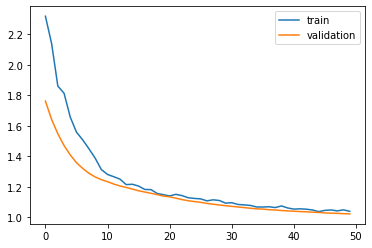

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

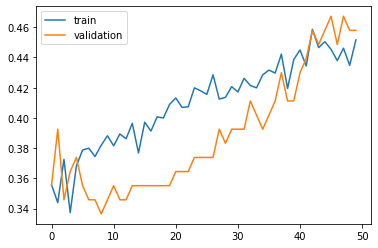

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [32]:
predictions = np.argmax(model.predict(x_test), axis=1)
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5157894736842106


## Betting time...

### Outcome when bet on home team
Just a sanity check. Should not see high/any yields

In [15]:
# agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']
agencies = ['B365']

In [16]:
print("Test set size", y_test.shape)

Test set size (380,)


In [17]:
bet_train
bet_test
x_train

,B365H,B365D,B365A,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,1.67,3.60,5.50,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-8
1,3.60,3.25,2.10,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2
2,2.25,3.25,3.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1
3,1.17,6.50,21.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-16
4,3.20,3.25,2.30,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,3.50,3.60,2.15,0.39,0.666667,0.650602,0.620253,0.000000,0.078947,1,0,1,1,1,3,1,3,3,0,0,0,1,0,0,0,0,0,-0.394737,0.394737,-0.078947,-0.236842,-4
2656,6.00,4.75,1.53,0.41,0.729167,0.614458,0.506329,0.078947,0.026316,3,3,1,1,3,0,1,3,0,3,0,0,0,0,0,0,0,0,-0.263158,0.789474,0.052632,0.026316,11
2657,2.05,3.75,3.70,0.38,0.479167,0.578313,0.759494,0.000000,0.078947,1,1,3,1,3,3,3,0,0,3,0,0,0,0,0,0,0,0,-0.263158,-0.368421,-0.078947,-0.131579,4
2658,2.40,3.60,3.00,0.33,0.645833,0.566265,0.620253,0.026316,0.026316,0,1,0,1,1,0,3,1,0,3,0,0,0,0,0,0,0,0,-0.368421,0.342105,0.000000,-0.157895,15


In [18]:
# Reference: https://github.com/raedovj/NN19_Project_Football/blob/master/ModelTester.py
from keras.utils.np_utils import to_categorical

def predict_always_on_one_thing_benefit(labels, betting_odds, predictable_value):
    predictable_indices = np.zeros((labels.shape[0], 3))
    predictable_indices[:, predictable_value] = 1
    
    agency = "B365"
    odds = pd.concat([betting_odds[agency+'H'], betting_odds[agency+'D'], betting_odds[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    r = odds * predictable_indices * to_categorical(labels)
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # Let's say we bet 1€. then our profit(or loss) would be = earnings€ - 1€ per bet
    r -= len(predictable_value)

    print("Agency %s, \twin amount: %.2f" % (agency, r.sum()))

Using TensorFlow backend.


In [19]:
## Profit for Away Wins Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [0]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0]) #Data Test

Agency B365, 	win amount: 33.66
Agency B365, 	win amount: 50.57


In [20]:
## Profit for Draw Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [1]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [1]) #Data Test

Agency B365, 	win amount: -96.47
Agency B365, 	win amount: -25.46


In [21]:
## Profit for Home Wins Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [2]) #Data Test

Agency B365, 	win amount: 5112.06
Agency B365, 	win amount: 685.15


In [22]:
## Profit for Home or Away 
predict_always_on_one_thing_benefit(y_train, bet_train, [0, 2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0, 2]) #Data Test

Agency B365, 	win amount: 5145.72
Agency B365, 	win amount: 735.72


In [23]:
## Profit for All Possibilities
predict_always_on_one_thing_benefit(y_train, bet_train, [0, 1, 2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0, 1, 2]) #Data Test

Agency B365, 	win amount: 5049.25
Agency B365, 	win amount: 710.26


### Bet on every match
Always bet on the predicted winner.

In [33]:
train_predictions_3x1 = model.predict(x_train)
test_predictions_3x1 = model.predict(x_test)
train_predictions = np.argmax(train_predictions_3x1 , axis=1)
test_predictions = np.argmax(test_predictions_3x1 , axis=1)

In [34]:
# train_predictions
# test_predictions
print(train_predictions_3x1.shape)
print(test_predictions_3x1.shape)
# x_train.shape
# x_test.shape

(2660, 3)
(380, 3)


In [35]:
def always_bet_predicted_winner_profit(predictions, labels, betting_odds):      
    predictions_categorical = to_categorical(predictions)
    
    agency = "B365"
    odds = pd.concat([betting_odds[agency+'H'], betting_odds[agency+'D'], betting_odds[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    r = odds * predictions_categorical * to_categorical(labels)
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # Let's say we bet 1€. then our profit(or loss) would be = earnings€ - 1€
    r -= 1
    
    print("Agency %s, \twin amount: %.2f" % (agency, r.sum()))

In [36]:
always_bet_predicted_winner_profit(train_predictions, y_train, bet_train)
always_bet_predicted_winner_profit(test_predictions, y_test, bet_test)

Agency B365, 	win amount: 6165.36
Agency B365, 	win amount: 894.39


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > threshold.

In [40]:
def bet_predicted_winner_with_threshold_profit(predictions_3x1, predictions, labels, 
                                                          betting_odds, threshold):
    predictions_categorical = to_categorical(predictions)
    
    agency = "B365"
    odds = pd.concat([betting_odds[agency+'H'], betting_odds[agency+'D'], betting_odds[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    bet = odds * predictions_categorical * predictions_3x1
    bet = bet > threshold
    r = odds * predictions_categorical * to_categorical(labels)
    r -= 1
    # Set win/lose amount to 0 on matched it didn't bet
    r[np.invert(bet)] = 0
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)

    skip_percentage = (r==0).sum() / r.shape[0] * 100   
    print("Agency %s, \twin amount: %.2f. Didn't bet on %.2f%% of matches" % (agency, r.sum(), skip_percentage))

In [43]:
bet_predicted_winner_with_threshold_profit(train_predictions_3x1, train_predictions, y_train, bet_train, threshold=1)
bet_predicted_winner_with_threshold_profit(test_predictions_3x1, test_predictions, y_test, bet_test, threshold=1)

Agency B365, 	win amount: 7440.49. Didn't bet on 52.44% of matches
Agency B365, 	win amount: 1065.25. Didn't bet on 51.32% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > threshold]

In [44]:
def predict_on_highest_return(predictions_3x1, labels, betting_odds, threshold):
        agency = "B365"
        odds = pd.concat([betting_odds[agency+'H'], betting_odds[agency+'D'], betting_odds[agency+'A']], axis=1)
        # Expected earning value. Basically expects that our NN predicts real match outcomes
        expected = (odds * predictions_3x1).values

        # Threshold matches, when we'd actually would make a bet. If expected yield is too low, it'll pass
        bet = np.max(expected > threshold, axis=1)

        # Take the highest yield of [home win, draw, other win]
        r = np.argmax(expected, axis=1) 

        # Calculate wins/losses according to real match results
        r = to_categorical(r) * to_categorical(labels)
        r -= 1 # subtract our input bet

        # Calculate earnings
        r = r.max(axis=1) # Take max value of win, draw, other win. 
        r[np.invert(bet)] = 0 # Set win/lose amount to 0 on matched it didn't bet

        skip_percentage = (bet==0).sum() / bet.shape[0] * 100   
        print("Agency %s, \twin amount: %.2f. Didn't bet on %.2f%% of matches" % (agency, r.sum(), skip_percentage))  

In [47]:
predict_on_highest_return(train_predictions_3x1, y_train, bet_train, threshold=2.5)
predict_on_highest_return(test_predictions_3x1, y_test, bet_test, threshold=2.5)

Agency B365, 	win amount: -299.00. Didn't bet on 63.87% of matches
Agency B365, 	win amount: -40.00. Didn't bet on 63.42% of matches
